In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn  as sns

In [0]:
link_corpus = "https://bit.ly/2kAO3Fv"

In [0]:
df_corpus = pd.read_csv(link_corpus)

In [0]:
df_corpus.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [0]:
dist = df_corpus.groupby(['airline_sentiment']).size()

In [0]:
dist = dist / dist.sum()

In [0]:
dist

airline_sentiment
negative    0.626913
neutral     0.211680
positive    0.161407
dtype: float64

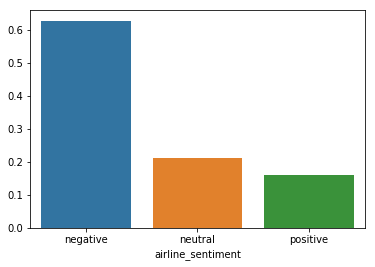

In [0]:
sns.barplot(dist.keys(), dist.values)

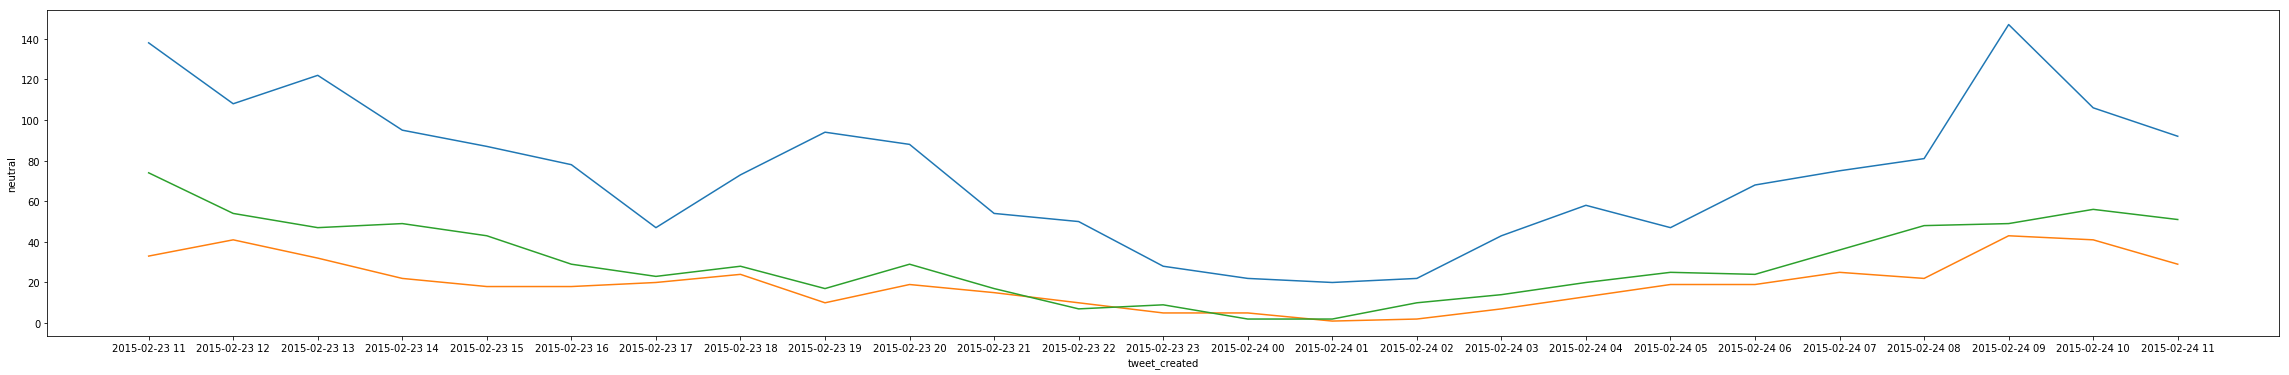

In [0]:
df_sentiment_group = df_corpus.groupby(by=['airline_sentiment', 
                                           df_corpus.tweet_created.str.slice(start=0,stop=13)])['airline_sentiment'].count()
df_sentiment_group.index.name = None
df_sentiment_group = df_sentiment_group.unstack('airline_sentiment')
df_sentiment_group = df_sentiment_group.reset_index()
df_sentiment_group = df_sentiment_group.tail(25)
plt.figure(figsize=(40, 6))

sns.lineplot(x=df_sentiment_group['tweet_created'], y=df_sentiment_group['negative'])
sns.lineplot(x=df_sentiment_group['tweet_created'], y=df_sentiment_group['positive'])
sns.lineplot(x=df_sentiment_group['tweet_created'], y=df_sentiment_group['neutral'])

In [0]:
df_sentiment_group

airline_sentiment,tweet_created,negative,neutral,positive
156,2015-02-23 11,138.0,74.0,33.0
157,2015-02-23 12,108.0,54.0,41.0
158,2015-02-23 13,122.0,47.0,32.0
159,2015-02-23 14,95.0,49.0,22.0
160,2015-02-23 15,87.0,43.0,18.0
161,2015-02-23 16,78.0,29.0,18.0
162,2015-02-23 17,47.0,23.0,20.0
163,2015-02-23 18,73.0,28.0,24.0
164,2015-02-23 19,94.0,17.0,10.0
165,2015-02-23 20,88.0,29.0,19.0


In [0]:
df_corpus['text_cleaned'] = df_corpus.text.str.replace('[^a-zA-Z]', ' ')
from sklearn.feature_extraction.text  import TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer(max_features=2500, min_df=7)

In [0]:
X = vectorizer.fit_transform(df_corpus['text_cleaned'])

In [0]:
X.shape

(14640, 2348)

In [0]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

# Train Test Split

In [0]:
import numpy as np
X = df_corpus['text_cleaned']
y = df_corpus['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Building Pipeline

In [0]:
classifier = MultinomialNB()
from sklearn.pipeline import Pipeline

sentiment_pipeline = Pipeline([('vectorizer',vectorizer),
                               ('classifier', classifier)])

# Training PRocess

In [0]:
sentiment_pipeline = sentiment_pipeline.fit(X_train, y_train)

# Testing PRocess

In [0]:
y_pred = sentiment_pipeline.predict(X_test)

In [0]:
y_pred

array(['negative', 'negative', 'neutral', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [0]:
X_test[0:5], y_pred[0:5]

(3340     united pleasantly surprised with quality of s...
 6417     SouthwestAir Why won t you let me leave Newark  
 207      VirginAmerica can you please get me to the ne...
 7985     JetBlue   looking forward to it when we final...
 7864     JetBlue Port Au Prince  Haiti for continued f...
 Name: text_cleaned, dtype: object,
 array(['negative', 'negative', 'neutral', 'negative', 'neutral'],
       dtype='<U8'))

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.73      0.98      0.84      2285
     neutral       0.77      0.30      0.43       787
    positive       0.91      0.42      0.58       588

    accuracy                           0.75      3660
   macro avg       0.81      0.57      0.61      3660
weighted avg       0.77      0.75      0.71      3660



In [0]:
print(confusion_matrix(y_test, y_pred))

[[2250   30    5]
 [ 534  234   19]
 [ 302   38  248]]


In [0]:
import pickle

In [0]:
s = pickle.dumps(sentiment_pipeline)

In [0]:
clf = pickle.loads(s)

In [0]:
X_test[100]

' VirginAmerica trying to add my boy Prince to my ressie  SF this Thursday  VirginAmerica from LAX http   t co GsB J c gM'

In [0]:
clf.predict([X_test[100]])

array(['neutral'], dtype='<U8')

# Streaming Twitter

In [0]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
import json

In [0]:
#@title Default title text
#consumer key, consumer secret, access token, access secret.
ckey=""
csecret=""
atoken=""
asecret=""

In [0]:
class listener(StreamListener):
  def on_data(self, data):
    all_data = json.loads(data)
    tweet = all_data['text']
    username = all_data['user']['screen_name']
    sentiment = clf.predict([tweet])
    print((username, tweet, sentiment))

  def on_error(self, status):
    print(status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["flight", "airplane", "airport"])
# twitterStream.filter(locations=[12.90,])


401
401


KeyboardInterrupt: ignored